#Avaliação Prática – Análise de Ganhadores e Perdedores com Janela Fixa e Estatísticas de Mercado

#Gabriel Dall'Acqua Pelícolla e Sophia Vinzinzotto Tavares

##Objetivo da Avaliação

Você deverá desenvolver um projeto em Python que:
- Consome a lista de ganhadores e perdedores do dia pela Alpha Vantage
- Seleciona automaticamente os 3 principais ativos de cada grupo (ganhadores e perdedores)
- Utiliza a API ANALYTICS_FIXED_WINDOW para coletar estatísticas de janela fixa (média, desvio
padrão, correlação)
- Compara o comportamento estatístico dos ativos vencedores e perdedores
- Identifica padrões de movimentação com base nos resultados e treina um classificador Naive
Bayes para prever a categoria de um ativo (ganhador ou perdedor) a partir de seus indicadores
estatísticos
- Exporta um relatório com as principais conclusões e recomendações de aprendizado de
mercado

##Importação das Bibliotecas

In [ ]:
!pip install plotly --upgrade
!pip install squarify --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 20.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [ ]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pickle

##Etapas Esperadas da Atividade

###1. Consulta à API TOP_GAINERS_LOSERS e seleção dos 3 principais ganhadores e 3 principais perdedores


In [ ]:
url_gainers_loser = 'https://www.alphavantage.co/query?function=TOP_GAINERS_LOSERS&apikey=23BGWI8HTXGH4RAF'

In [ ]:
r = requests.get(url_gainers_loser)
data = r.json()

In [ ]:
time_series= data["top_gainers"]
estatistica_mercado = pd.DataFrame.from_dict(time_series)
estatistica_mercado

,ticker,price,change_amount,change_percentage,volume
0,GPUS,7.75,6.38,465.6934%,295618339
1,AIMDW,0.3,0.23,328.5714%,223250
2,RMSGW,0.065,0.0385,145.283%,82160
3,NITO,0.68,0.397,140.2827%,593482508
4,NCNA,1.1,0.6231,130.6563%,137373243
5,KLTOW,0.02,0.01,100.0%,2502
6,ZCARW,0.02,0.0099,98.0198%,1291654
7,NVNIW,0.0729,0.0334,84.557%,39068
8,PTIXW,0.0044,0.0019,76.0%,33748
9,CURIW,0.0282,0.0107,61.1429%,5189


In [ ]:
gainers = pd.DataFrame.from_dict(data["top_gainers"])
gainers["change_percentage"] = gainers["change_percentage"].str.replace('%', '').astype(float)
top_3_gainers = gainers.sort_values(by="change_percentage", ascending=False).head(3)
print("Top 3 Ganhadores:")
print(top_3_gainers[["ticker", "price", "change_percentage"]])

Top 3 Ganhadores:
  ticker  price  change_percentage
0   GPUS   7.75           465.6934
1  AIMDW    0.3           328.5714
2  RMSGW  0.065           145.2830


In [ ]:
losers = pd.DataFrame.from_dict(data["top_losers"])
losers["change_percentage"] = losers["change_percentage"].str.replace('%', '').astype(float)
top_3_losers = losers.sort_values(by="change_percentage").head(3)
print("\nTop 3 Perdedores:")
print(top_3_losers[["ticker", "price", "change_percentage"]])


Top 3 Perdedores:
  ticker price  change_percentage
0   EPWK  5.61           -74.9777
1   ENGS  3.09           -66.4130
2   BWSN   7.5           -56.6040


###2. Para cada um dos ativos selecionados, uso da API ANALYTICS_FIXED_WINDOW com RANGE de 2 meses (ex: 2023-07-01 a 2023-08-31), INTERVAL diário e OHLC = close

###3. Coleta dos cálculos estatísticos disponíveis: MEAN, STDDEV, CORRELATION





####Ganhadores

In [ ]:
symbols_gainers = list(top_3_gainers["ticker"])
symbols_gainers_str = ",".join(symbols_gainers)

In [ ]:
url_analytics_gainers = (
    f"https://www.alphavantage.co/query?function=ANALYTICS_FIXED_WINDOW&SYMBOLS={symbols_gainers_str}&RANGE=2025-03-01&RANGE=2025-04-30&INTERVAL=DAILY&OHLC=close&CALCULATIONS=MEAN,STDDEV,CORRELATION&apikey=23BGWI8HTXGH4RAF")

In [ ]:
response_gainers = requests.get(url_analytics_gainers)
analytics_gainers_data = response_gainers.json()
analytics_gainers_data

{'meta_data': {'symbols': 'AIMDW,RMSGW,GPUS',
  'min_dt': '2025-03-03',
  'max_dt': '2025-04-30',
  'ohlc': 'Close',
  'interval': 'DAILY',
  'MissingData': {'AIMDW': ['2025-03-10',
    '2025-04-02',
    '2025-04-07',
    '2025-04-09',
    '2025-04-25',
    '2025-04-28',
    '2025-04-29',
    '2025-04-30'],
   'RMSGW': ['2025-03-05',
    '2025-03-12',
    '2025-03-13',
    '2025-03-27',
    '2025-03-28',
    '2025-04-14',
    '2025-04-16',
    '2025-04-24',
    '2025-04-29',
    '2025-04-30']}},
 'payload': {'RETURNS_CALCULATIONS': {'MEAN': {'AIMDW': 0.026909510360549418,
    'RMSGW': 0.013978675627698414,
    'GPUS': -0.017274447644758936},
   'STDDEV': {'AIMDW': 0.22086716145877072,
    'RMSGW': 0.19202610149669447,
    'GPUS': 0.0710668917344477},
   'CORRELATION': {'index': ['AIMDW', 'RMSGW', 'GPUS'],
    'correlation': [[1.0],
     [-0.1500487413, 1.0],
     [-0.340699968, -0.0498363039, 1.0]]}}}}

####Perdedores

In [ ]:
symbols_losers = list(top_3_losers["ticker"])
symbols_losers_str = ",".join(symbols_losers)

In [ ]:
url_analytics_losers = (
    f"https://www.alphavantage.co/query?function=ANALYTICS_FIXED_WINDOW&SYMBOLS={symbols_losers_str}&RANGE=2025-03-01&RANGE=2025-04-30&INTERVAL=DAILY&OHLC=close&CALCULATIONS=MEAN,STDDEV,CORRELATION&apikey=23BGWI8HTXGH4RAF")

In [ ]:
response_losers = requests.get(url_analytics_losers)
analytics_losers_data = response_losers.json()
analytics_losers_data

{'meta_data': {'symbols': 'ENGS,BWSN,EPWK',
  'min_dt': '2025-03-03',
  'max_dt': '2025-04-30',
  'ohlc': 'Close',
  'interval': 'DAILY',
  'MissingData': {'ENGS': ['2025-03-04',
    '2025-03-05',
    '2025-03-06',
    '2025-03-07',
    '2025-03-10',
    '2025-03-11',
    '2025-03-12',
    '2025-03-13',
    '2025-03-14',
    '2025-03-17',
    '2025-03-18',
    '2025-03-19',
    '2025-03-20',
    '2025-03-21',
    '2025-03-24',
    '2025-03-25',
    '2025-03-26',
    '2025-03-27',
    '2025-03-28',
    '2025-03-31',
    '2025-04-01']}},
 'payload': {'RETURNS_CALCULATIONS': {'MEAN': {'ENGS': 0.036402538773888285,
    'BWSN': -0.00408389712400703,
    'EPWK': 0.04073188632075731},
   'STDDEV': {'ENGS': 0.08969243266744462,
    'BWSN': 0.02070650975871361,
    'EPWK': 0.1044044822479322},
   'CORRELATION': {'index': ['ENGS', 'BWSN', 'EPWK'],
    'correlation': [[1.0],
     [-0.054882509, 1.0],
     [0.6518852087, -0.2872364165, 1.0]]}}}}

In [ ]:
mean_data = analytics_gainers_data['payload']['RETURNS_CALCULATIONS']['MEAN']
stddev_data = analytics_gainers_data['payload']['RETURNS_CALCULATIONS']['STDDEV']
symbols = list(mean_data.keys())

classification = 'Ganhador'

df_gainers = pd.DataFrame({
    'Ativo': symbols_gainers,
    'Mean': [mean_data[symbol] for symbol in symbols],
    'StdDev': [stddev_data[symbol] for symbol in symbols],
    'Classificação': classification
})
print(df_gainers)

   Ativo      Mean    StdDev Classificação
0   GPUS  0.026910  0.220867      Ganhador
1  AIMDW  0.013979  0.192026      Ganhador
2  RMSGW -0.017274  0.071067      Ganhador


###4. Montagem de um DataFrame com os campos estatísticos e a classe associada (ganhador ou perdedor)


In [ ]:
df_analytics_gainers = pd.merge(
    df_gainers,
    gainers,
    left_on='Ativo',
    right_on='ticker',
    how='inner'
)
df_analytics_gainers

,Ativo,Mean,StdDev,Classificação,ticker,price,change_amount,change_percentage,volume
0,GPUS,0.026910,0.220867,Ganhador,GPUS,7.75,6.38,465.6934,295618339
1,AIMDW,0.013979,0.192026,Ganhador,AIMDW,0.3,0.23,328.5714,223250
2,RMSGW,-0.017274,0.071067,Ganhador,RMSGW,0.065,0.0385,145.2830,82160


In [ ]:
mean_data_losers = analytics_losers_data['payload']['RETURNS_CALCULATIONS']['MEAN']
stddev_data_losers = analytics_losers_data['payload']['RETURNS_CALCULATIONS']['STDDEV']
symbols_losers = list(mean_data_losers.keys())

classification = 'Perdedor'

df_losers = pd.DataFrame({
    'Ativo': symbols_losers,
    'Mean': [mean_data_losers[symbol] for symbol in symbols_losers],
    'StdDev': [stddev_data_losers[symbol] for symbol in symbols_losers],
    'Classificação': classification
})

print(df_losers)

  Ativo      Mean    StdDev Classificação
0  ENGS  0.036403  0.089692      Perdedor
1  BWSN -0.004084  0.020707      Perdedor
2  EPWK  0.040732  0.104404      Perdedor


In [ ]:
df_analytics_losers = pd.merge(
    df_losers,
    losers,
    left_on='Ativo',
    right_on='ticker',
    how='inner'
)
df_analytics_losers

,Ativo,Mean,StdDev,Classificação,ticker,price,change_amount,change_percentage,volume
0,ENGS,0.036403,0.089692,Perdedor,ENGS,3.09,-6.11,-66.4130,9878939
1,BWSN,-0.004084,0.020707,Perdedor,BWSN,7.5,-9.7827,-56.6040,115367
2,EPWK,0.040732,0.104404,Perdedor,EPWK,5.61,-16.81,-74.9777,3272395


A remoção do atributo correlação do DataFrame se justifica principalmente por limitações impostas pela versão gratuita da API utilizada. Essa versão permite no máximo 5 symbols por requisição, enquanto os requisitos da prova exigem a análise de 6 symbols — sendo 3 classificados como ganhadores e 3 como perdedores. Para contornar essa limitação, foram realizadas duas requisições separadas, cada uma contendo 3 symbols.

No entanto, o campo de correlação é exponencial em complexidade, pois representa uma matriz que descreve a correlação de cada symbol com todos os outros. Com 6 symbols, seriam necessárias 36 correlações (6x6), o que exigiria um número maior de requisições para cobrir todas as combinações possíveis. Como cada requisição com 5 symbols retorna apenas 25 correlações (5x5), seria necessário um processo adicional e trabalhoso para completar todas as correlações faltantes, resultando em maior custo computacional e logístico.

Dessa forma, optou-se pela exclusão do atributo de correlação do DataFrame final, mantendo apenas os campos estatísticos de média e desvio padrão, juntamente com a classificação de cada ativo como "ganhador" ou "perdedor", o que atende de forma eficiente aos requisitos principais da análise, sem comprometer a integridade dos dados utilizados.

###8. Visualizações: boxplots, distribuição de médias, gráfico de dispersão com STDDEV e CORRELATION


In [130]:
df_analytics = pd.concat([df_analytics_gainers, df_analytics_losers], ignore_index=True)
df_analytics

,Ativo,Mean,StdDev,Classificação,ticker,price,change_amount,change_percentage,volume
0,GPUS,0.026910,0.220867,Ganhador,GPUS,7.75,6.38,465.6934,295618339
1,AIMDW,0.013979,0.192026,Ganhador,AIMDW,0.3,0.23,328.5714,223250
2,RMSGW,-0.017274,0.071067,Ganhador,RMSGW,0.065,0.0385,145.2830,82160
3,ENGS,0.036403,0.089692,Perdedor,ENGS,3.09,-6.11,-66.4130,9878939
4,BWSN,-0.004084,0.020707,Perdedor,BWSN,7.5,-9.7827,-56.6040,115367
5,EPWK,0.040732,0.104404,Perdedor,EPWK,5.61,-16.81,-74.9777,3272395


In [131]:
df_analytics = df_analytics.drop(columns=['ticker'])

In [132]:
df_analytics.describe()

,Mean,StdDev,change_percentage
count,6.000000,6.000000,6.000000
mean,0.016111,0.116461,123.592183
std,0.023072,0.075766,231.310547
min,-0.017274,0.020707,-74.977700
25%,0.000432,0.075723,-63.960750
50%,0.020444,0.097048,44.339500
75%,0.034029,0.170121,282.749300
max,0.040732,0.220867,465.693400


In [133]:
df_analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ativo              6 non-null      object 
 1   Mean               6 non-null      float64
 2   StdDev             6 non-null      float64
 3   Classificação      6 non-null      object 
 4   price              6 non-null      object 
 5   change_amount      6 non-null      object 
 6   change_percentage  6 non-null      float64
 7   volume             6 non-null      object 
dtypes: float64(3), object(5)
memory usage: 516.0+ bytes


In [134]:
df_analytics['price'] = pd.to_numeric(df_analytics['price'].str.replace(',', '.'), errors='coerce')
df_analytics['change_amount'] = pd.to_numeric(df_analytics['change_amount'].str.replace(',', '.'), errors='coerce')
df_analytics['volume'] = pd.to_numeric(df_analytics['volume'].str.replace(',', '.'), errors='coerce')

In [135]:
df_analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ativo              6 non-null      object 
 1   Mean               6 non-null      float64
 2   StdDev             6 non-null      float64
 3   Classificação      6 non-null      object 
 4   price              6 non-null      float64
 5   change_amount      6 non-null      float64
 6   change_percentage  6 non-null      float64
 7   volume             6 non-null      int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 516.0+ bytes


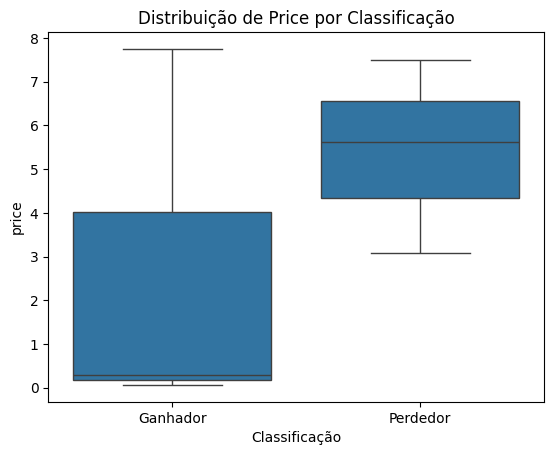

In [136]:
sns.boxplot(x='Classificação', y='price', data=df_analytics)
plt.title('Distribuição de Price por Classificação')
plt.show()

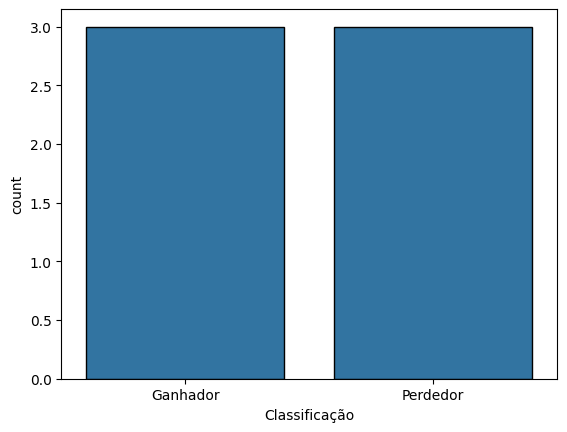

In [137]:
sns.countplot(x = df_analytics['Classificação'], edgecolor='black')
plt.show()

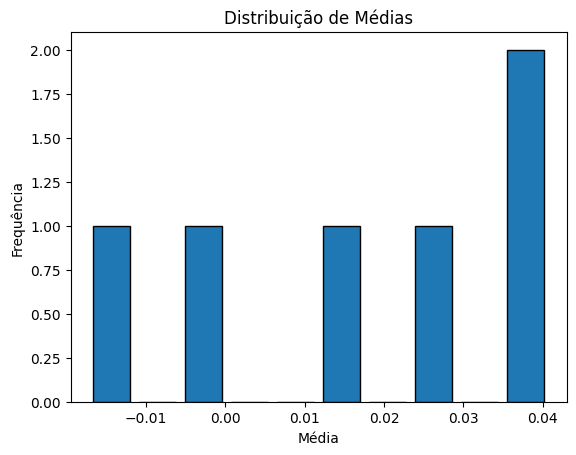

In [138]:
plt.hist(df_analytics['Mean'], rwidth=0.8, edgecolor='black')
plt.xlabel('Média')
plt.ylabel('Frequência')
plt.title('Distribuição de Médias')
plt.show()

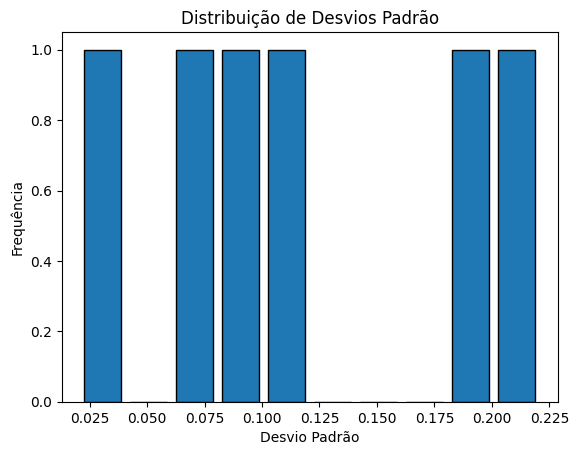

In [139]:
plt.hist(df_analytics['StdDev'], rwidth=0.8, edgecolor='black')
plt.xlabel('Desvio Padrão')
plt.ylabel('Frequência')
plt.title('Distribuição de Desvios Padrão')
plt.show()

In [140]:
porcentagem_volume = px.treemap(df_analytics, path=['Classificação', 'Ativo'], values='StdDev')
porcentagem_volume.show()

In [141]:
classificacao_ativo = px.parallel_categories(
    df_analytics,
    dimensions=['Classificação', 'Ativo']
)
classificacao_ativo.show()

In [142]:
classificacao_ativo_price = px.parallel_categories(
    df_analytics,
    dimensions=['Classificação', 'Ativo', 'price']
)
classificacao_ativo_price.show()

In [143]:
classificacao_mean = px.parallel_categories(
    df_analytics,
    dimensions=['Classificação', 'Mean']
)
classificacao_mean.show()

###5. Normalização dos dados e separação treino/teste


In [144]:
df_analytics.columns

Index(['Ativo', 'Mean', 'StdDev', 'Classificação', 'price', 'change_amount',
       'change_percentage', 'volume'],
      dtype='object')

In [151]:
X_analytics = df_analytics[['Mean', 'StdDev', 'price', 'change_amount', 'change_percentage', 'volume']].values
X_analytics


array([[ 2.69095104e-02,  2.20867161e-01,  7.75000000e+00,
         6.38000000e+00,  4.65693400e+02,  2.95618339e+08],
       [ 1.39786756e-02,  1.92026101e-01,  3.00000000e-01,
         2.30000000e-01,  3.28571400e+02,  2.23250000e+05],
       [-1.72744476e-02,  7.10668917e-02,  6.50000000e-02,
         3.85000000e-02,  1.45283000e+02,  8.21600000e+04],
       [ 3.64025388e-02,  8.96924327e-02,  3.09000000e+00,
        -6.11000000e+00, -6.64130000e+01,  9.87893900e+06],
       [-4.08389712e-03,  2.07065098e-02,  7.50000000e+00,
        -9.78270000e+00, -5.66040000e+01,  1.15367000e+05],
       [ 4.07318863e-02,  1.04404482e-01,  5.61000000e+00,
        -1.68100000e+01, -7.49777000e+01,  3.27239500e+06]])

In [152]:
X_analytics.shape

(6, 6)

In [153]:
X_analytics[0]

array([2.69095104e-02, 2.20867161e-01, 7.75000000e+00, 6.38000000e+00,
       4.65693400e+02, 2.95618339e+08])

In [154]:
Y_analytics = df_analytics['Classificação'].values
Y_analytics

array(['Ganhador', 'Ganhador', 'Ganhador', 'Perdedor', 'Perdedor',
       'Perdedor'], dtype=object)

In [155]:
Y_analytics.shape

(6,)

In [157]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
X_analytics = standardScaler.fit_transform(X_analytics)
X_analytics

array([[ 0.51272789,  1.50954437,  1.18021628,  1.41766243,  1.62012978,
         2.2349502 ],
       [-0.10122922,  1.09255086, -1.1977719 ,  0.60453747,  0.97074467,
        -0.46980016],
       [-1.58513013, -0.65631708, -1.27278227,  0.57921821,  0.1027238 ,
        -0.47109204],
       [ 0.96345768, -0.38702289, -0.30722331, -0.23370842, -0.89983035,
        -0.38138898],
       [-0.95884169, -1.384444  ,  1.10041802, -0.71929607, -0.85337669,
        -0.47078798],
       [ 1.16901546, -0.17431126,  0.49714317, -1.64841363, -0.94039122,
        -0.44188103]])

In [158]:
from sklearn.model_selection import train_test_split

In [164]:
X_analytics_treino, X_analytics_teste, Y_analytics_treino, Y_analytics_teste = train_test_split(X_analytics, Y_analytics, test_size=0.30, random_state=0)

In [165]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:
with open('/content/drive/MyDrive/am5t2/am5s/pickle/analytics.pkl', mode ='wb') as f:
  pickle.dump([X_analytics_treino, X_analytics_teste, Y_analytics_treino, Y_analytics_teste], f)

###6. Treinamento com algoritmo Naive Bayes (GaussianNB) para prever a classe com base nos indicadores estatísticos

In [170]:

from sklearn.naive_bayes import GaussianNB

In [171]:
with open('/content/drive/MyDrive/am5t2/am5s/pickle/analytics.pkl', 'rb') as f:
  X_analytics_treino, X_analytics_teste, Y_analytics_treino, Y_analytics_teste= pickle.load(f)

In [172]:
X_analytics_treino.shape, X_analytics_teste.shape

((4, 6), (2, 6))

In [173]:
naive_analytics = GaussianNB()
naive_analytics.fit(X_analytics_treino, Y_analytics_treino)
analytics_previsoes = naive_analytics.predict(X_analytics_teste)
analytics_previsoes

array(['Perdedor', 'Ganhador'], dtype='<U8')

###7. Avaliação do modelo com classification_report, confusion_matrix e accuracy_score


In [174]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [175]:
analytics_accuracy = accuracy_score(Y_analytics_teste, analytics_previsoes)
print ('P/A =', analytics_accuracy*100, '%')

P/A = 100.0 %


In [176]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


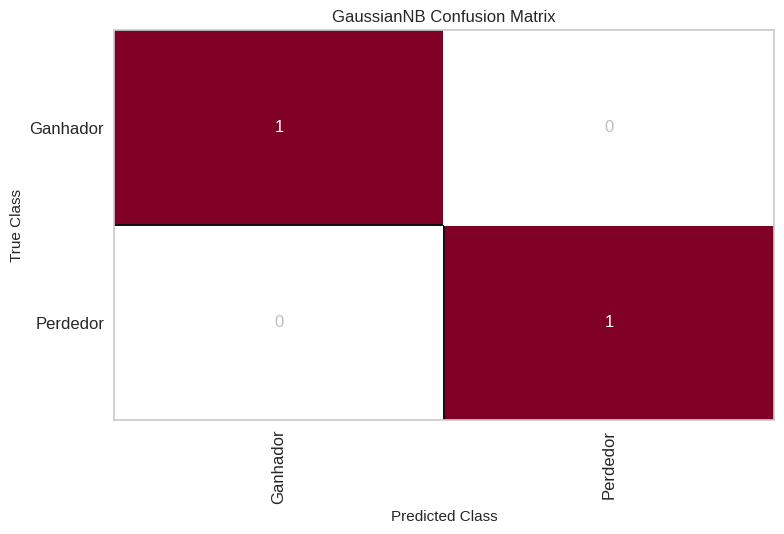

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [178]:
analytics_accuracy = ConfusionMatrix(GaussianNB())
analytics_accuracy.fit(X_analytics_treino, Y_analytics_treino)
analytics_accuracy.score(X_analytics_teste, Y_analytics_teste)
analytics_accuracy.show()

In [179]:
print(classification_report(Y_analytics_teste, analytics_previsoes))

              precision    recall  f1-score   support

    Ganhador       1.00      1.00      1.00         1
    Perdedor       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



###9. Exportação do dataset final para .csv

###10. Conclusão com recomendações: quais padrões indicam comportamento de ganhador ou perdedor?